2023-12-05 01:46:05.588 | INFO     | __main__:try_ccxt:20 -                       symbol      timestamp                  datetime  \
askPrice            BTC/USDT  1701711965614  2023-12-04T17:46:05.614Z   
askQty              BTC/USDT  1701711965614  2023-12-04T17:46:05.614Z   
bidPrice            BTC/USDT  1701711965614  2023-12-04T17:46:05.614Z   
bidQty              BTC/USDT  1701711965614  2023-12-04T17:46:05.614Z   
closeTime           BTC/USDT  1701711965614  2023-12-04T17:46:05.614Z   
count               BTC/USDT  1701711965614  2023-12-04T17:46:05.614Z   
firstId             BTC/USDT  1701711965614  2023-12-04T17:46:05.614Z   
highPrice           BTC/USDT  1701711965614  2023-12-04T17:46:05.614Z   
lastId              BTC/USDT  1701711965614  2023-12-04T17:46:05.614Z   
lastPrice           BTC/USDT  1701711965614  2023-12-04T17:46:05.614Z   
lastQty             BTC/USDT  1701711965614  2023-12-04T17:46:05.614Z   
lowPrice            BTC/USDT  1701711965614  2023-12-04T17:46:05

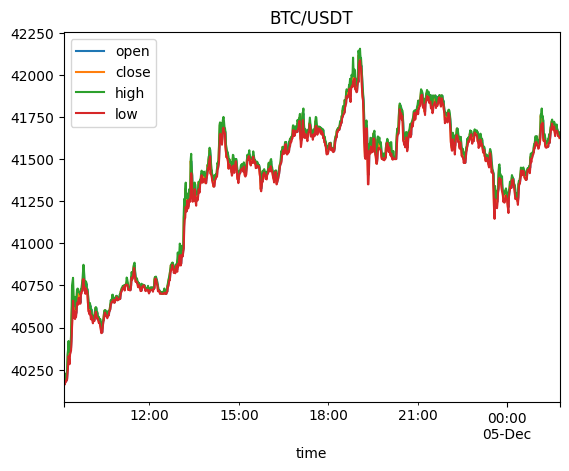

In [26]:

import ccxt
import matplotlib.pyplot as plt
import pandas as pd
from loguru import logger


def try_ccxt():
    exchange = ccxt.binance(config={
        'timeout': 200000,

        # use local http proxy
        'proxies': {
            'http': 'http://127.0.0.1:7890',
            'https': 'http://127.0.0.1:7890',
        }
    })

    ticker = exchange.fetch_ticker('BTC/USDT')
    df = pd.DataFrame(ticker)
    logger.info(df)

    df = pd.DataFrame(
        exchange.fetch_ohlcv('BTC/USDT', timeframe='1m', limit=1000),
        columns=['time', 'open', 'high', 'low', 'close', 'volume']
    )

    logger.info(f'1m ticks: {df}')

    # 绘制图表
    df.set_index('time', inplace=True)
    # 时间改为北京时间
    df.index = pd.to_datetime(df.index, unit='ms') + pd.Timedelta(hours=8)

    # df['close'].plot()
    # df['open'].plot()
    # 画出开盘/收盘价格对比图
    df[['open', 'close', 'high', 'low']].plot()

    # 绘图方式 2:
    plt.plot(
        df.index,
        df[['open', 'close', 'high', 'low']],
        label='open',
        linestyle='--',
        linewidth=1,
        alpha=0.5
    )

    plt.title('BTC/USDT')
    plt.show()


try_ccxt()